<a href="https://colab.research.google.com/github/alkhurayjah/Building-a-Diabetes-Prediction-Model-using-ML-algorithms/blob/main/Graduation%20Project%20%E2%80%93%20Diabetes%20Prediction%20Model%20Using%20ML%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imprt data set and Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
wr.filterwarnings('ignore')
import gradio as gr
import os

In [ ]:
file_path = "/content/drive/MyDrive/balanced_diabetes_dataset_filtered.csv"
dataset = pd.read_csv(file_path)

# Data analysis

In [ ]:
dataset.shape

(16998, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16998 entries, 0 to 16997
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               16998 non-null  int64  
 1   age                  16998 non-null  float64
 2   hypertension         16998 non-null  int64  
 3   heart_disease        16998 non-null  int64  
 4   smoking_history      16998 non-null  int64  
 5   bmi                  16998 non-null  float64
 6   HbA1c_level          16998 non-null  float64
 7   blood_glucose_level  16998 non-null  int64  
 8   diabetes             16998 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [ ]:
dataset.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000
mean,0.441758,50.665412,0.151488,0.088305,0.180021,29.427427,6.163766,163.245264,0.500059
std,0.496611,21.445955,0.358535,0.283746,0.948430,7.392769,1.283926,56.973886,0.500015
min,0.000000,0.080000,0.000000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,36.000000,0.000000,0.000000,-1.000000,25.890000,5.700000,130.000000,0.000000
50%,0.000000,54.000000,0.000000,0.000000,0.000000,27.320000,6.100000,155.000000,1.000000
75%,1.000000,67.000000,0.000000,0.000000,1.000000,32.770000,6.600000,200.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,2.000000,88.720000,9.000000,300.000000,1.000000


In [ ]:
dataset.nunique()

,0
gender,2
age,102
hypertension,2
heart_disease,2
smoking_history,4
bmi,3288
HbA1c_level,18
blood_glucose_level,18
diabetes,2


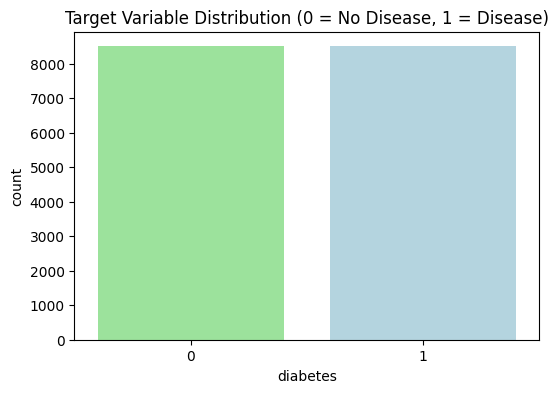

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=dataset, palette={'0': 'lightgreen', '1': 'lightblue'})
plt.title("Target Variable Distribution (0 = No Disease, 1 = Disease)")
plt.show()

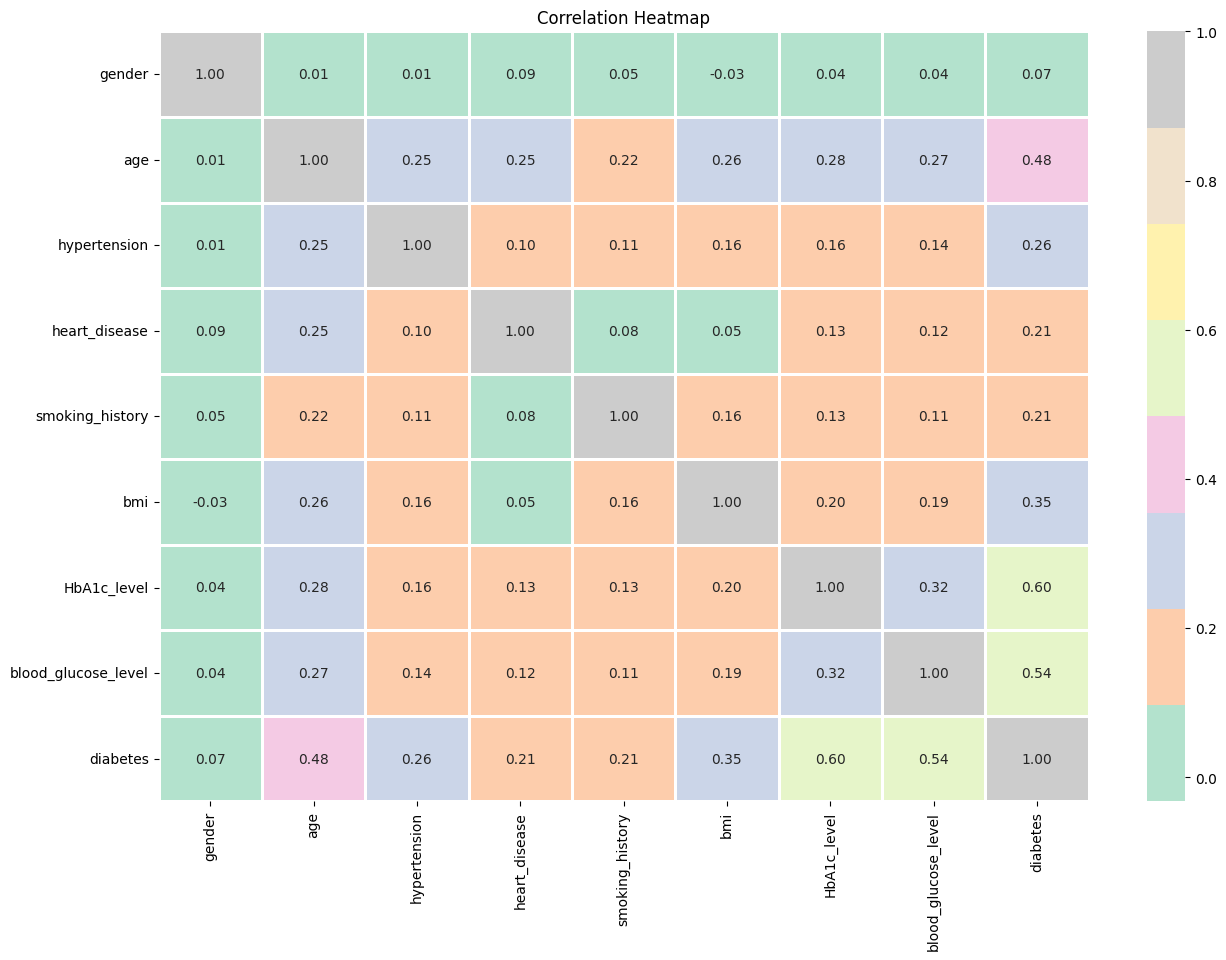

In [ ]:
plt.figure(figsize=(15, 10))

sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

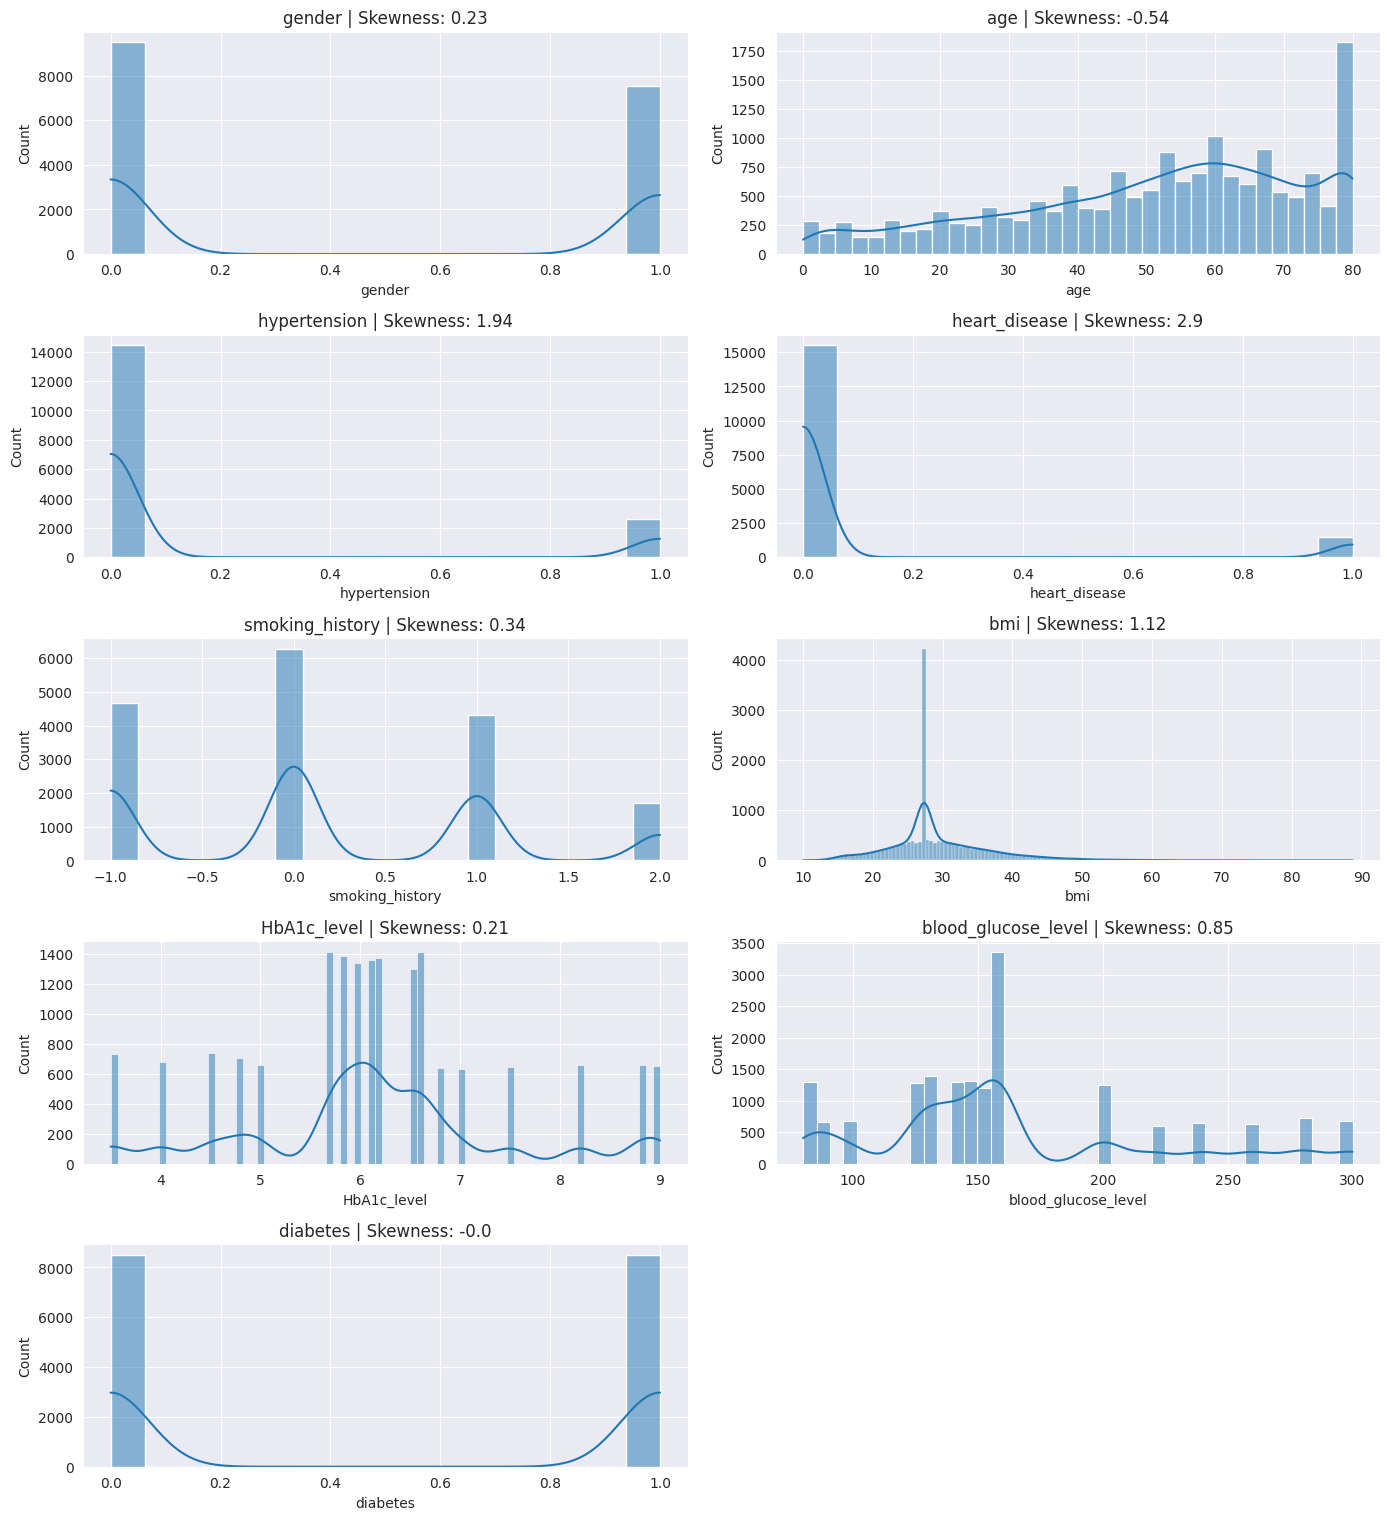

In [ ]:
sns.set_style("darkgrid")

numerical_columns = dataset.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(dataset[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dataset[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

# Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = dataset.drop(columns=["diabetes"])
y = dataset["diabetes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1695
           1       0.91      0.91      0.91      1705

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [ ]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [ ]:
features = features.head(15)
print(features)

                            0
gender               0.008067
age                  0.177543
hypertension         0.021301
heart_disease        0.014349
smoking_history      0.027721
bmi                  0.131414
HbA1c_level          0.341577
blood_glucose_level  0.278027


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')

In [ ]:
recall = recall_score(y_test, y_pred, average='weighted')

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print("\nRandom Forest Metrics")
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:   " , recall)
print("F1-score: ", f1)


Random Forest Metrics
Accuracy:  0.9070588235294118
Precision: 0.9070648589477428
Recall:    0.9070588235294118
F1-score:  0.9070590164871387


In [ ]:
joblib.dump(rf, "rf_model")

['rf_model']

# KNN Algorethm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = dataset.drop(columns=["diabetes"])
y = dataset["diabetes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [ ]:
joblib.dump(knn_model, "knn_model")

['knn_model']

In [ ]:
print("\nKNN Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}")



KNN Metrics:
Accuracy: 0.8524
Precision: 0.8524
Recall: 0.8524
F1-score: 0.8524


#SVM Algorithm

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
X = dataset.drop(columns=["diabetes"])
y =dataset["diabetes"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
joblib.dump(svm_model, "svm_model")

['svm_model']

In [ ]:
print("\nSVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")


SVM Metrics:
Accuracy: 0.8856
Precision: 0.8856
Recall: 0.8856
F1-score: 0.8856


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = dataset.drop(columns=["diabetes"])
y =dataset["diabetes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gb = gb_model.predict(X_test)

In [ ]:
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")


Gradient Boosting Metrics:
Accuracy: 0.9106
Precision: 0.9107
Recall: 0.9106
F1-score: 0.9106


In [ ]:
joblib.dump(gb_model, "gb_model")

['gb_model']

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = dataset.drop(columns=["diabetes"])
y =dataset["diabetes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
joblib.dump(lr_model, "lr_model")

['lr_model']

In [ ]:
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")


Logistic Regression Metrics:
Accuracy: 0.8876
Precision: 0.8877
Recall: 0.8876
F1-score: 0.8876


# User interface

In [ ]:
#model1 = joblib.load("rf_model")
#model1 = Random Forest
model2 = joblib.load("gb_model")
#model2 = Gradient Boosting
#model3 = joblib.load("knn_model")
#model3 = KNN
#model4 = joblib.load("svm_model")
#model4 = SVM
#model5 = joblib.load("lr_model")
#model5 = Logistic Regression

In [ ]:
def predict_patient(gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c, glucose):
    try:
        model = joblib.load("gb_model")
        gender_value = 1 if gender == "Male" else 0
        hypertension_value = 1 if hypertension == "Yes" else 0
        heart_disease_value = 1 if heart_disease == "Yes" else 0

        smoking_map = {
            "never": -1,
            "No Info": 0,
            "former": 1,
            "current": 2,


        }
        smoking_value = smoking_map.get(smoking_history, 1)

        try:
            input_data = np.array([[
                gender_value,
                float(age),
                hypertension_value,
                heart_disease_value,
                smoking_value,
                float(bmi),
                float(hba1c),
                float(glucose)
            ]])
        except ValueError:
            return "Error: Please enter valid numeric values.", None

        if np.isnan(input_data).any():
            return "Error: Some fields are missing or invalid.", None

        prediction = model.predict(input_data)[0]

        if prediction == 0:
            result_text = "<div style='color: green; font-weight: bold; font-size: 18px;'>✅ No Risk Detected</div>"
            image_path = "/content/drive/MyDrive/foto1.jpg"
        else:  # prediction == 1
            result_text = (
                "<div style='color: red; font-weight: bold; font-size: 18px;'>🚨 High Risk Detected!</div>"
                "<ul>"
                "<li>📞 Ministry of Health Hotline: <strong>937</strong></li>"
                "<li>🌐 <a href='https://www.moh.gov.sa' target='_blank'>Visit the Ministry of Health Website</a></li>"
                "</ul>"
            )
            image_path = "/content/drive/MyDrive/foto3.jpg"

        if not os.path.exists(image_path):
            return f"Error: Image not found at {image_path}", None

        return result_text, image_path

    except Exception as e:
        return f"Error: {str(e)}", None

iface = gr.Interface(
    fn=predict_patient,
    inputs=[
        gr.Radio(choices=["Male", "Female"], label="Gender"),
        gr.Textbox(label="Age"),
        gr.Radio(choices=["Yes", "No"], label="Hypertension"),
        gr.Radio(choices=["Yes", "No"], label="Heart Disease"),
        gr.Dropdown(choices=["never", "No Info", "former", "current"], label="Smoking History"),
        gr.Textbox(label="BMI"),
        gr.Textbox(label="HbA1c Level"),
        gr.Textbox(label="Blood Glucose Level"),
    ],
    outputs=[gr.Markdown(), gr.Image(type="filepath")],
    title="Diabetes Risk Prediction",
    description="Enter patient information to predict diabetes risk using a trained Gradient Boosting model."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://333c2c4a6f4ab18991.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
